In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
df = pd.read_csv('1697_csv.csv', sep=';')
# df.head()

In [3]:
df.shape

In [4]:
df.info()

In [5]:
df.describe()

In [6]:
# df.columns

In [7]:
df = df.drop(columns = ['Drawn', 'Lost'])
df1 = df.drop(columns=['Possesion', 'Passing Accuracy', 'Crossing Accuracy', 'Club ID', 'Result'])
# df1.columns

In [8]:
df2 = df[['Club ID', 'Matches Played', 'Result', 'Possesion', 'Passing Accuracy', 'Crossing Accuracy']]
df2 = df2.reset_index()
# df2.head()

In [9]:
df1 = df1.transform(lambda x: x / df['Matches Played']).round(decimals=2)

In [10]:
rename =[(i, i + ' Rate') for i in df1.columns.values]
df1 = df1.rename(columns = dict(rename))
df1 = df1.reset_index()
df1.head()

,index,Matches Played Rate,Won Rate,Total Attempts Rate,Shots On Target Rate,Shots Off Target Rate,Shots Woodwork Rate,Shots Crossbar Rate,Shots Post Rate,Shots Blocked Rate,...,Saves Rate,Goals Conceded Rate,Own Goals Conceded Rate,Saves from Penalties Rate,Clean Sheets Rate,Punches Made Rate,Fouls Committed Rate,Fouls Suffered Rate,Yellow Cards Rate,Red Cards Rate
0,0,1.0,0.75,16.25,6.50,6.38,0.50,0.00,0.38,3.38,...,1.88,1.00,0.12,0.0,0.25,0.25,14.62,9.75,1.88,0.00
1,1,1.0,0.17,13.50,5.00,4.67,0.67,0.33,0.33,3.83,...,3.50,2.17,0.00,0.0,0.17,0.17,11.33,12.33,1.50,0.00
2,2,1.0,0.30,9.60,2.70,4.70,0.20,0.10,0.00,2.20,...,2.60,1.00,0.00,0.0,0.30,0.20,12.80,11.30,2.50,0.40
3,3,1.0,0.33,10.00,1.83,4.83,0.17,0.17,0.00,3.33,...,2.67,1.50,0.00,0.0,0.50,0.33,13.83,11.00,2.17,0.17
4,4,1.0,0.70,19.20,7.00,7.60,0.50,0.00,0.30,4.60,...,1.80,0.70,0.00,0.0,0.40,0.30,11.50,9.40,1.20,0.00


In [11]:
df = df2.merge(df1, left_on='index', right_on='index')
df = df.drop(columns = ['index', 'Matches Played Rate'])
# df.columns

In [12]:
# df.iloc[:, 2:].corr()

In [13]:
# plt.figure(figsize=(16,16))
df_corr = df.iloc[:, 2:].corr()
df_corr.to_csv('1697_corr.csv', index=True)
# sns.heatmap(df_corr)

Text(0.5, 1.0, 'Correlations Between Club Stats in EUFA Champions League 2021/22')

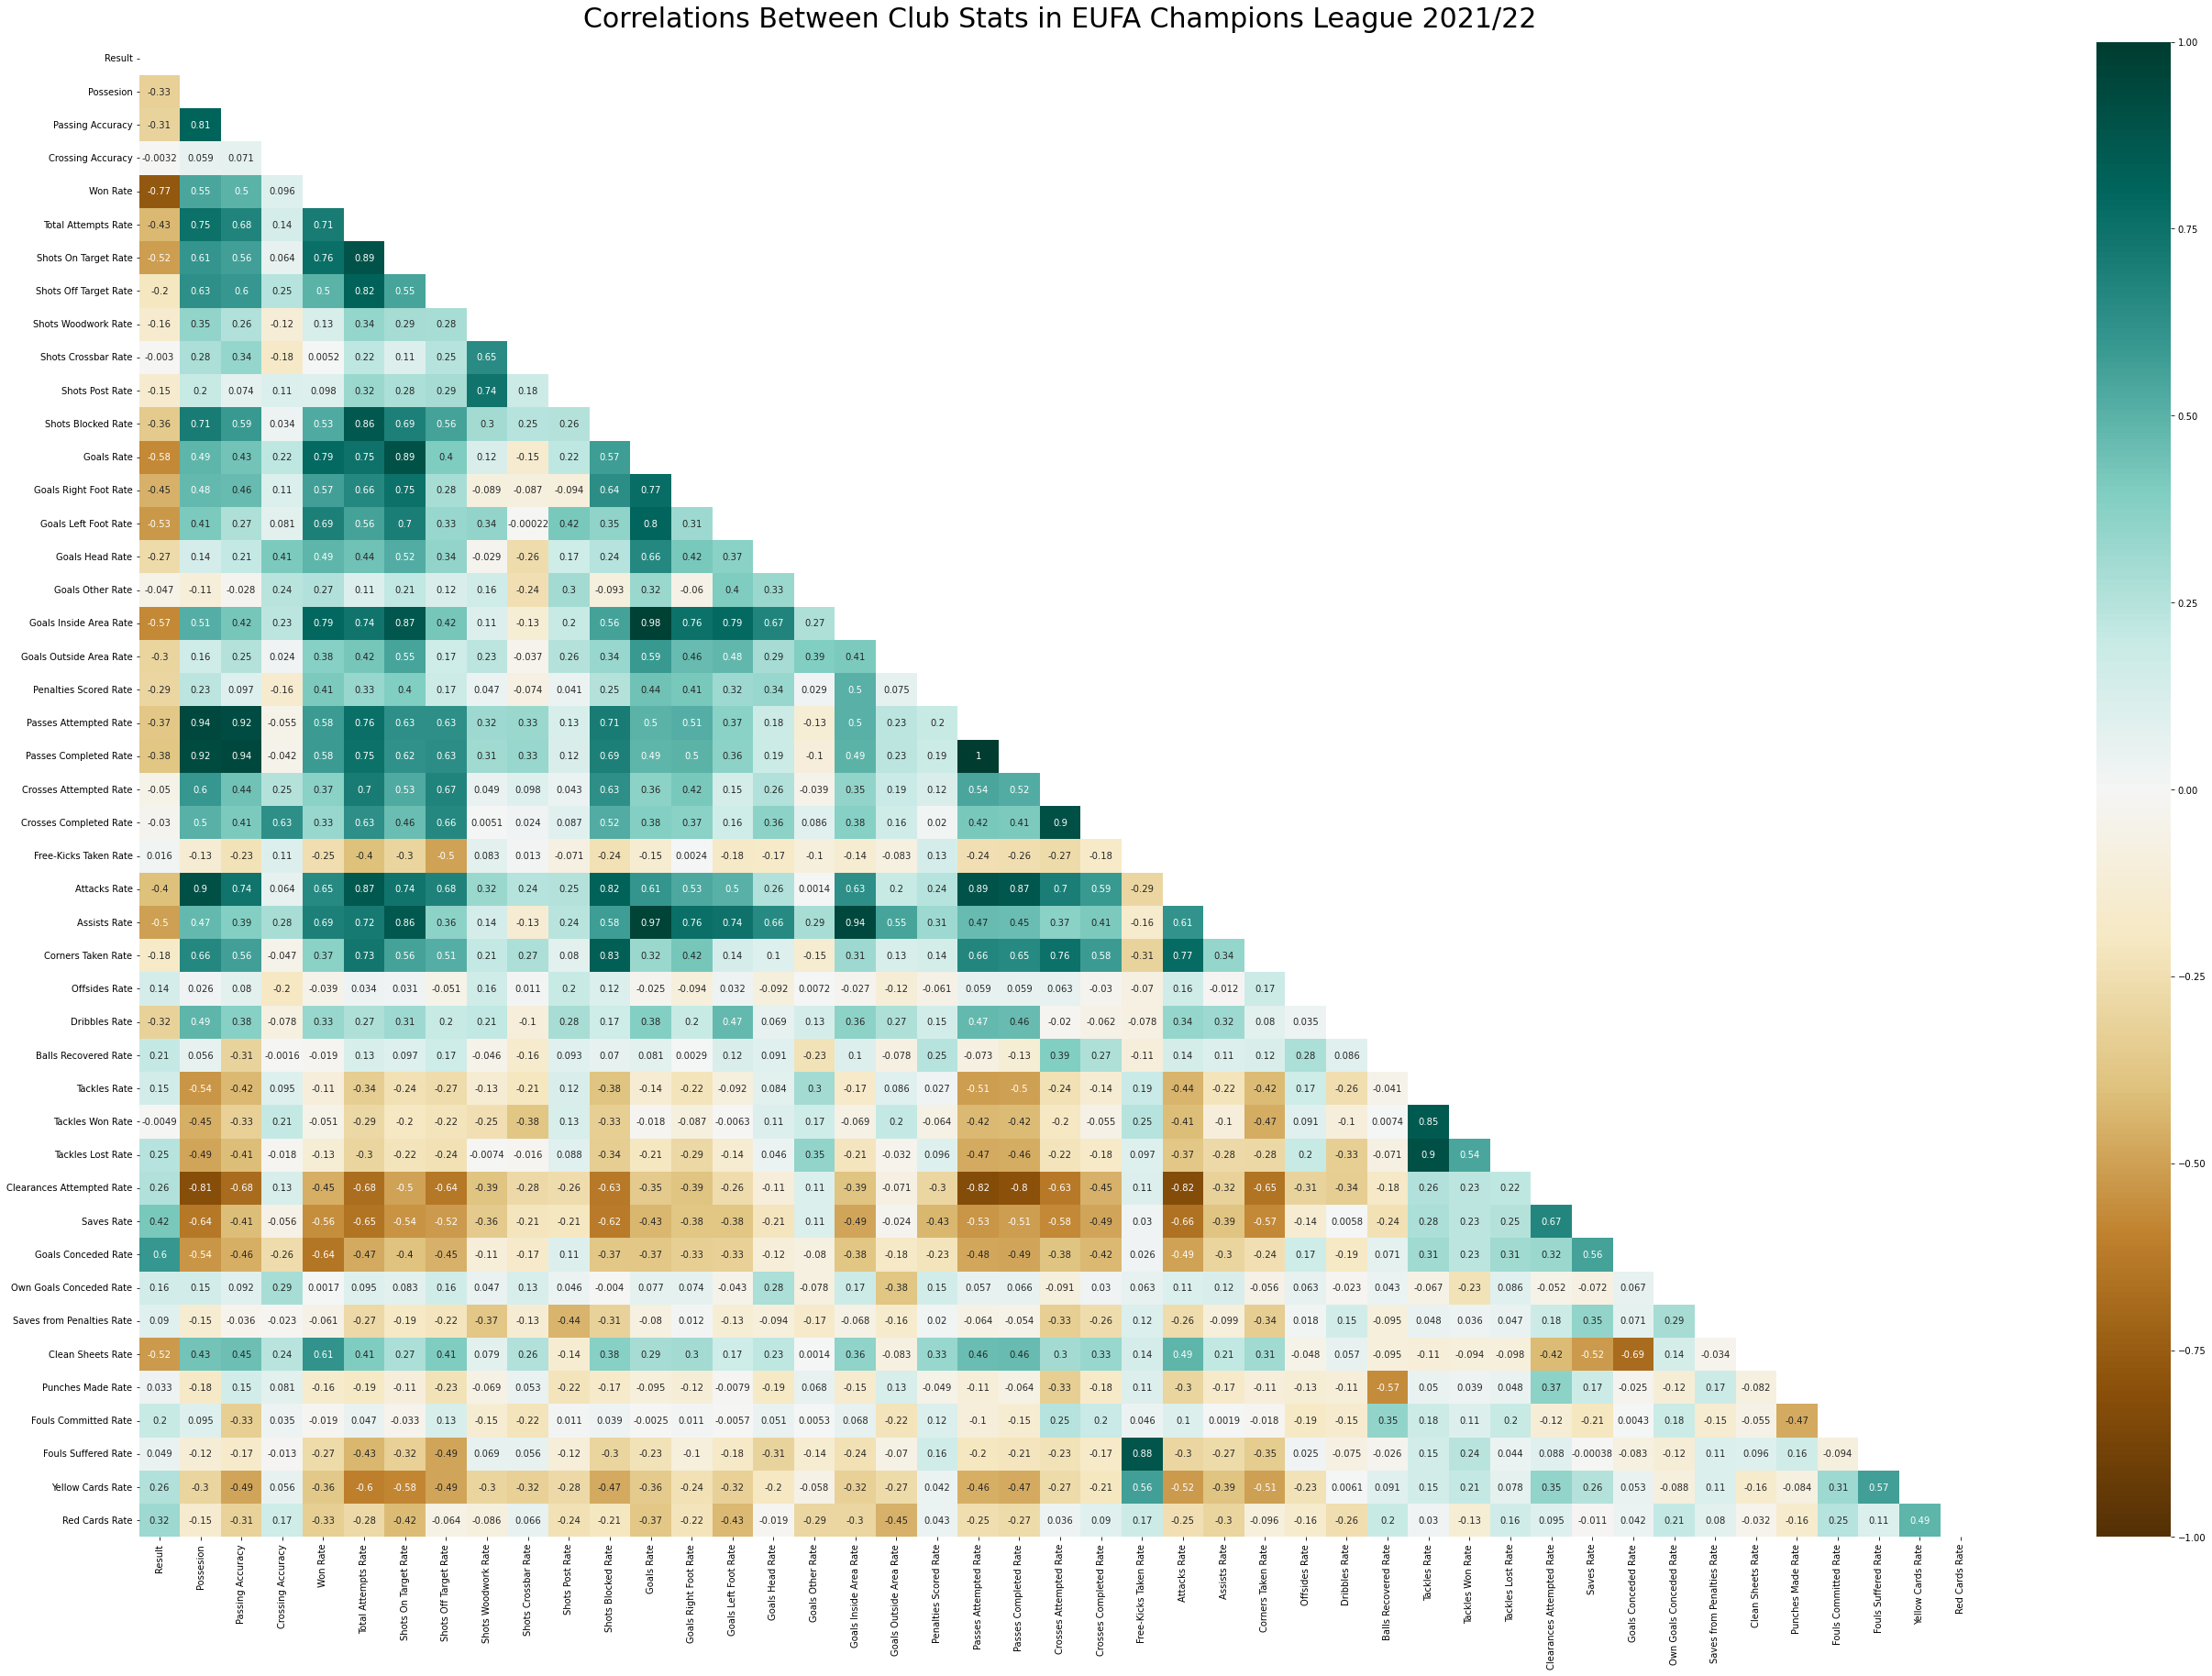

In [14]:
plt.figure(figsize=(45,30))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
heatmap = sns.heatmap(df_corr, mask = mask, vmin = -1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlations Between Club Stats in EUFA Champions League 2021/22', fontdict={'fontsize':30}, pad=16)

In [15]:
df.to_csv('1697_rate.csv', index=False)
df.head()

,Club ID,Matches Played,Result,Possesion,Passing Accuracy,Crossing Accuracy,Won Rate,Total Attempts Rate,Shots On Target Rate,Shots Off Target Rate,...,Saves Rate,Goals Conceded Rate,Own Goals Conceded Rate,Saves from Penalties Rate,Clean Sheets Rate,Punches Made Rate,Fouls Committed Rate,Fouls Suffered Rate,Yellow Cards Rate,Red Cards Rate
0,1,8,9,59.5,87.6,33,0.75,16.25,6.50,6.38,...,1.88,1.00,0.12,0.0,0.25,0.25,14.62,9.75,1.88,0.00
1,2,6,17,51.3,82.0,29,0.17,13.50,5.00,4.67,...,3.50,2.17,0.00,0.0,0.17,0.17,11.33,12.33,1.50,0.00
2,3,10,5,41.5,77.5,22,0.30,9.60,2.70,4.70,...,2.60,1.00,0.00,0.0,0.30,0.20,12.80,11.30,2.50,0.40
3,4,6,17,55.8,87.8,25,0.33,10.00,1.83,4.83,...,2.67,1.50,0.00,0.0,0.50,0.33,13.83,11.00,2.17,0.17
4,5,10,5,60.1,88.8,27,0.70,19.20,7.00,7.60,...,1.80,0.70,0.00,0.0,0.40,0.30,11.50,9.40,1.20,0.00


In [16]:
df[['Matches Played', 'Won Rate']].sort_values(by="Won Rate", ascending=False)

,Matches Played,Won Rate
14,13,0.77
0,8,0.75
4,10,0.70
7,10,0.70
22,13,0.69
12,8,0.62
17,12,0.58
11,8,0.50
20,8,0.50
9,6,0.50


In [17]:
df_x = df.drop(columns=['Club ID', 'Result'])
df_y = df['Result']

In [18]:
X, y = df_x, df_y

In [19]:
df_y.unique()

array([ 9, 17,  5,  1,  3], dtype=int64)

In [20]:
pca = PCA()
Xt = pca.fit_transform(X)

plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.show()

In [21]:
np.round(Xt, decimals=2)

In [22]:
Xt.shape

In [23]:
df_pca = pd.DataFrame(Xt)
df_pca

In [24]:
df_pca_viz = df_y.reset_index().merge(df_pca.reset_index(), left_on='index', right_on='index')
df_pca_viz = df_pca_viz.drop(columns=['index'])
df_pca_viz.head(2)

In [25]:
fig = px.scatter_3d(df_pca_viz, x=0, y=1, z=2, color='Result', width=800, height=800)
fig.show()

In [26]:
df_club_name = pd.read_csv('1697_clubs.csv', sep=';')
df_club_name.head(2)

,Club ID,Club,Country
0,1,Ajax,Netherlands
1,2,Atalanta,Italy


In [27]:
df_pca_viz = df_club_name.reset_index().merge(df_pca_viz.reset_index(), left_on='index', right_on='index')
df_pca_viz = df_pca_viz.drop(columns=['index'])
df_pca_viz.head(2)

In [28]:
fig = px.scatter_3d(df_pca_viz, x=0, y=1, z=2, color='Club', width=800, height=800)
fig.show()

In [29]:
df_pca_viz.to_csv('1697_pca_viz.csv', index=False)

In [30]:
df.columns.values.tolist()

In [31]:
df_std = df_club_name.reset_index().merge(df.reset_index(), left_on='index', right_on='index')
df_std.head()
df_std = df_std.drop(columns=['index', 'Club ID_x', 'Club ID_y', 'Country'])
df_std = df_std.set_index('Club')
df_std.head()


,Matches Played,Result,Possesion,Passing Accuracy,Crossing Accuracy,Won Rate,Total Attempts Rate,Shots On Target Rate,Shots Off Target Rate,Shots Woodwork Rate,...,Saves Rate,Goals Conceded Rate,Own Goals Conceded Rate,Saves from Penalties Rate,Clean Sheets Rate,Punches Made Rate,Fouls Committed Rate,Fouls Suffered Rate,Yellow Cards Rate,Red Cards Rate
Club,,,,,,,,,,,,,,,,,,,,,
Ajax,8,9,59.5,87.6,33,0.75,16.25,6.50,6.38,0.50,...,1.88,1.00,0.12,0.0,0.25,0.25,14.62,9.75,1.88,0.00
Atalanta,6,17,51.3,82.0,29,0.17,13.50,5.00,4.67,0.67,...,3.50,2.17,0.00,0.0,0.17,0.17,11.33,12.33,1.50,0.00
Atletico,10,5,41.5,77.5,22,0.30,9.60,2.70,4.70,0.20,...,2.60,1.00,0.00,0.0,0.30,0.20,12.80,11.30,2.50,0.40
Barcelona,6,17,55.8,87.8,25,0.33,10.00,1.83,4.83,0.17,...,2.67,1.50,0.00,0.0,0.50,0.33,13.83,11.00,2.17,0.17
Bayern,10,5,60.1,88.8,27,0.70,19.20,7.00,7.60,0.50,...,1.80,0.70,0.00,0.0,0.40,0.30,11.50,9.40,1.20,0.00


In [32]:
df_std[df_std.columns.values.tolist()] = StandardScaler().fit_transform(df_std[df_std.columns.values.tolist()])
df_std = df_std.reset_index()
df_std = df_std.T
# df.columns = df.iloc[1]
df_std.columns = df_std.iloc[0]
df_std = df_std.reset_index()
df_std = df_std.rename(columns={'index': 'Stats'}, index={'Club': 'index'})
# df.drop(df.index[1])
df_std = df_std.drop(df_std.index[0])
df_std.head()
df_std.to_csv('1697_std.csv', index=False)